<a href="https://colab.research.google.com/github/MartinPG22/Clustering-Estrellas/blob/main/p2_10472279_100472236.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Determinación de tipos de Estrellas** #


---


G1:

    Martín Portugal González: 100472279

    Alba Vidales Casado: 100472236

Enlace repositorio: https://github.com/albavidales/Aprendizaje-Automatico-P2-100472279-100472236.git


---



## 1. Implementación de K-means ##

### Xmeans ###

En este primer apartado, se presenta una implementación del algoritmo k-means desde cero.

Este código está estructurado en una clase llamada XMeans, que permite la aplicación del algoritmo k-means y su posterior evaluación. A continuación, se detallan los pasos fundamentales de la implementación:

- **Inicialización de los centroides:** En el método *fit*, los centroides se inicializan mediante una selección aleatoria de puntos de datos en el conjunto de entrada.

- **Asignación de los datos a los clústers:** Una vez inicializados los centroides, cada punto de los datos se asigna al clúster representado por el centroide más cercano. Esta asignación se realiza de forma iterativa utilizando el método *recalculate_clusters*. Para cada punto el método calcula la distancia euclidiana a todos los centroides y lo asigna al clúster cuyo centroide esté más cerca.

- **Actualización de los clústers:** Tras obtener los clústers, se llama al método *recalculate_centroids*, que recalcula la posición de los centroides basándose en los puntos de datos asignados a cada clúster. Para cada clúster, se calcula la media de las coordenadas de todos los puntos de datos asignados a ese clúster, y esa media se convierte en la nueva posición del centroide.

- Es importante recalcar que el proceso de asignación y actualización se repite iterativamente hasta que los centroides convergen o se alcanza el número máximo de iteraciones especificado.

In [ ]:
import numpy as np
import time

class XMeans:
    def __init__(self, k=4, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def fit(self, X):
        # Step 1: Initialize centroids randomly
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace=False)]

        # Step 2: Assign each data point to the nearest centroid
        self.clusters = self.recalculate_clusters(X, self.centroids, self.k)

        # Step 3: Update centroids based on the current clusters
        for _ in range(self.max_iters):
            new_centroids = self.recalculate_centroids(self.centroids, self.clusters, self.k)
            # If centroids don't change, break
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
            self.clusters = self.recalculate_clusters(X, self.centroids, self.k)

    def predict(self, X):
        predictions = []
        for data in X:
            euc_dist = [np.linalg.norm(data - centroid) for centroid in self.centroids]
            predictions.append(np.argmin(euc_dist))
        return np.array(predictions)

    def recalculate_clusters(self, X, centroids, k):
        """ Recalculates the clusters """
        clusters = {}
        for i in range(k):
            clusters[i] = []
        for data in X:
            euc_dist = []
            for j in range(k):
                euc_dist.append(np.linalg.norm(data - centroids[j]))
            clusters[euc_dist.index(min(euc_dist))].append(data)
        return clusters

    def recalculate_centroids(self, centroids, clusters, k):
        """ Recalculates the centroid position based on the plot """
        for i in range(k):
            centroids[i] = np.average(clusters[i], axis=0)
        return centroids

Para probar el código implementado, se han utilizado datos generados artificialmente mediante la funcion *make_blobs* de la biblioteca de *sklearn*.

Con dicha función se han generado 300 datos que se han distribuido en 4 centros, con un desplazamiento estándar de 0.60.

Posteriormente, se utiliza el algoritmo Xmeans para ajustar el modelo, y una vez ajustado, se visualizan los datos junto con los centroides calculados por el algoritmo para cada clúster.

También vemos como se imprime el tiempo de ejecución que ha llevado realizar el ajuste del modelo con el algoritmo implementado, junto con el *silhouette_score*, métricas que nos ayudarán a llevar a cabo la comparación con el algoritmo Kmeans implementado en la biblioteca de *sklearn*.

Tiempo de XMeans:  0.010520458221435547
Silhouette Score:  0.6819938690643478


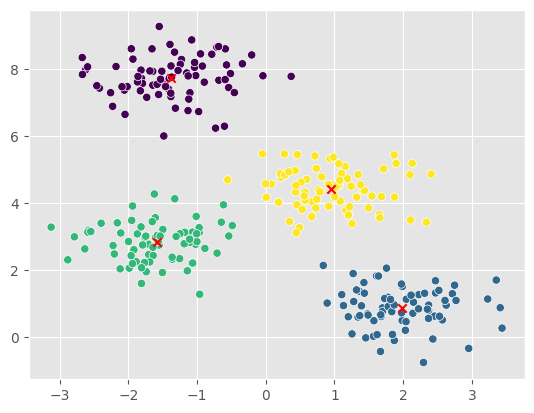

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0, n_features=2)

xmeans = XMeans()
start_time = time.time()
xmeans.fit(X)
training_time = time.time() - start_time

# Calcular Silhouette Score
silhouette = silhouette_score(X, xmeans.predict(X))

print("Tiempo de XMeans: ", training_time)
print("Silhouette Score: ", silhouette)

# Generar el gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=xmeans.predict(X), cmap='viridis', edgecolors='white')
# Marcar los centroides de los clusters con una 'x' roja
plt.scatter(xmeans.centroids[:, 0], xmeans.centroids[:, 1], marker='x', color='red')

# Mostrar el gráfico
plt.show()

### Kmeans ###


A continuación, se utilizarán exáctamente los mismos datos que se han ajustado con Xmeans, para comparar las diferencias en cuanto al tiempo de ejecuación el el *Silohuette Score* del Xmeans frente al Kmeans de *sklearn*.

Tiempo de KMeans:  0.0593569278717041
Silhouette Score:  0.6819938690643478


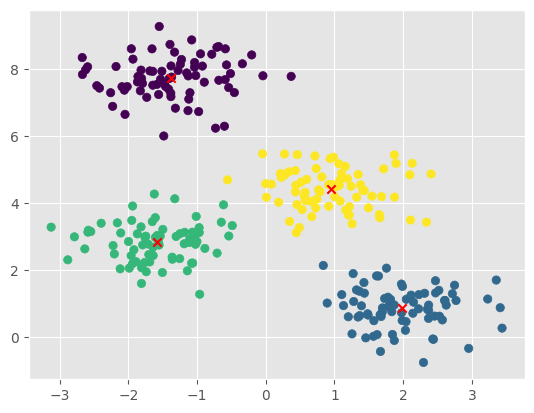

In [ ]:
from sklearn.cluster import KMeans

modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=100472279)

# Iniciar el contador de tiempo antes de ajustar el modelo
start_time = time.time()

# Ajustar el modelo KMeans a los datos X
modelo_kmeans.fit(X)

# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time

# Imprimir el tiempo de entrenamiento
print("Tiempo de KMeans: ", training_time)

# Calcular el score de Silhouette
silhouette = silhouette_score(X, modelo_kmeans.predict(X))
print("Silhouette Score: ", silhouette)

# Generar el gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], c=modelo_kmeans.predict(X), cmap='viridis')

# Marcar los centroides de los clusters con una 'x' roja
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], marker='x', color='red')

# Mostrar el gráfico
plt.show()

### Conclusiones ###

El algoritmo *XMeans* implementado tardó significativamente menos tiempo en ejecutarse en comparación con el *KMeans* de *scikit-learn*. Esto sugiere que la implementación de XMeans puede ser más eficiente en términos de tiempo de ejecución.

La diferencia en el tiempo de ejecución podría deberse a que *KMeans* utiliza un método de inicialización de centroides diferente al de *XMeans*. Por defecto, *sklearn* utiliza el método *k-means++* para inicializar los centroides, que es más sofisticado que la inicialización aleatoria utilizada en la implementación de XMeans.

Por otro lado, tenemos que ambos algoritmos obtienen un *Score de Silhouette* similar, lo que indica que los clústeres generados por ambos métodos tienen una buena separación y cohesión entre ellos.

Lo anterior sugiere que tanto *XMeans* como *KMeans* son capaces de encontrar estructuras de clústeres significativas en el conjunto de datos. Esta métrica oscila entre -1 y 1, donde un valor más cercano a 1 indica una mejor separación entre los clústeres. En este caso, ambos algoritmos obtuvieron scores bastante altos, lo cuál sugiere que los clústeres generados son coherentes y bien separados.

## 2. Preparación del Dataset ##

A continuación, prepararemos nuestro conjunto de datos para trabajar con él. Comenzamos cargando los datos desde el archivo CSV *Stars2.csv*. Utilizaremos la biblioteca pandas para cargar los datos en un DataFrame (dataset).

In [ ]:
import pandas as pd
import seaborn as sns
import math


nombre_archivo = "Stars2.csv"
dataset = pd.read_csv(nombre_archivo, sep = ',')
dataset.head(240)

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


Continuaremos realizando una  limpieza de los datos, y lo haremos agrupando ciertos colores que tenían valores iguales, pero el formato no era el mismo, por ejemplo Blue-white y Blue-White.

Además, pondremos todos los colores en minúscula para evitar futuras confusiones al trabajar con los datos.

In [ ]:
# Reemplazar los valores en la columna 'color'
dataset['Color'] = dataset['Color'].replace('Blue-white', 'Blue White')
dataset['Color'] = dataset['Color'].replace('Blue-White', 'Blue White')
dataset['Color'] = dataset['Color'].replace('yellow-white', 'Yellow White')
dataset['Color'] = dataset['Color'].replace('White-Yellow', 'Yellow White')
dataset['Color'] = dataset['Color'].replace('Red-Orange', 'Red Orange')
dataset['Color'] = dataset['Color'].replace('Orange-Red', 'Red Orange')

# Convertir los valores de la columna 'color' a minúsculas
dataset['Color'] = dataset['Color'].str.lower()

## 3. Transformación de los datos categóricos ##

Dado que en nuestros datos contamos con variables categóricas como "Color" y "Spectral Class", es necesario transformar estos valores para poder utilizarlos de manera efectiva en nuestros modelos.

Para lograr lo anterior, emplearemos técnicas de codificación que nos permitan representar estas variables categóricas con números enteros únicos. En este caso, utilizaremos la técnica del *One Hot Encoding* y de la *Codificación Cardinal*.

### One Hot Encoding ###

*One Hot Encoding* es una técnica que convierte variables categóricas en vectores binarios. Cada categoría se representa como un vector con un único valor de 1 (o varios en caso de que sea compuesto), indicando su presencia, y el resto de los valores como 0. Esto crea columnas adicionales en el conjunto de datos para cada categoría única, permitiendo que los algoritmos de aprendizaje automático interpreten estas variables correctamente.

Aplicaremos esta técnica y guardaremos el resultado de transformar el colo en un nuevo DataFrame *dataset_encoded*.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Separamos la columna 'color' por los espacios en blanco
colors_split = dataset['Color'].str.get_dummies(sep=' ')

# Concatenamos el DataFrame de colores divididos con el DataFrame original
dataset_encoded = pd.concat([dataset, colors_split], axis=1)

# Eliminamos la columna color con los datos categoricos
dataset_encoded = dataset_encoded.drop('Color', axis=1)

# Mostramos el conjunto de datos resultante
print("Conjunto de datos con codificación binaria:")
print(dataset_encoded)

Conjunto de datos con codificación binaria:
     Temperature              L          R    A_M Spectral_Class  blue  \
0           3068       0.002400     0.1700  16.12              M     0   
1           3042       0.000500     0.1542  16.60              M     0   
2           2600       0.000300     0.1020  18.70              M     0   
3           2800       0.000200     0.1600  16.65              M     0   
4           1939       0.000138     0.1030  20.06              M     0   
..           ...            ...        ...    ...            ...   ...   
235        38940  374830.000000  1356.0000  -9.93              O     1   
236        30839  834042.000000  1194.0000 -10.63              O     1   
237         8829  537493.000000  1423.0000 -10.73              A     0   
238         9235  404940.000000  1112.0000 -11.23              A     0   
239        37882  294903.000000  1783.0000  -7.80              O     1   

     orange  pale  red  white  whitish  yellow  yellowish  
0      

Para comprobar que lo anterior funcionó correctamente, imprimiremos aquellos datos que tengan el color "blue white" asignado. Lo vemos a continuación:

In [ ]:
# Filtrar las filas que contienen tanto 'Blue' como 'White'
blue_white_rows = dataset_encoded[(dataset_encoded['blue'] == 1) & (dataset_encoded['white'] == 1)]

# Mostrar las filas que contienen tanto 'Blue' como 'White'
print("Filas que contienen tanto 'Blue' como 'White':")
print(blue_white_rows)

Filas que contienen tanto 'Blue' como 'White':
     Temperature             L           R     A_M Spectral_Class  blue  \
20         25000       0.05600     0.00840  10.580              B     1   
24         16500       0.01300     0.01400  11.890              B     1   
26          8570       0.00081     0.00970  14.200              A     1   
31         30000   28840.00000     6.30000  -4.200              B     1   
32         15276    1136.00000     7.20000  -1.970              B     1   
83         17200       0.00098     0.01500  12.450              B     1   
84         14100       0.00067     0.00890  12.170              B     1   
85          9675       0.00045     0.01090  13.980              A     1   
86         12010       0.00078     0.00920  12.130              B     1   
87         10980       0.00074     0.00870  11.190              B     1   
94          9030      45.00000     2.63000   1.450              A     1   
95         11250     672.00000     6.98000  -2.300   

Ahora haremos exactamente lo mismo con la columna de Clase Espectral:

In [ ]:
# Separamos la columna 'color' por los espacios en blanco
class_split = dataset_encoded['Spectral_Class'].str.get_dummies(sep=' ')

# Concatenamos el DataFrame de colores divididos con el DataFrame original
dataset_encoded = pd.concat([dataset_encoded, class_split], axis=1)

# Eliminamos la columna color con los datos categoricos
dataset_encoded = dataset_encoded.drop('Spectral_Class', axis=1)

dataset_encoded['Cluster'] = 0

# Mostramos el conjunto de datos resultante
print("Conjunto de datos con codificación binaria:")
print(dataset_encoded)

Conjunto de datos con codificación binaria:
     Temperature              L          R    A_M  blue  orange  pale  red  \
0           3068       0.002400     0.1700  16.12     0       0     0    1   
1           3042       0.000500     0.1542  16.60     0       0     0    1   
2           2600       0.000300     0.1020  18.70     0       0     0    1   
3           2800       0.000200     0.1600  16.65     0       0     0    1   
4           1939       0.000138     0.1030  20.06     0       0     0    1   
..           ...            ...        ...    ...   ...     ...   ...  ...   
235        38940  374830.000000  1356.0000  -9.93     1       0     0    0   
236        30839  834042.000000  1194.0000 -10.63     1       0     0    0   
237         8829  537493.000000  1423.0000 -10.73     0       0     0    0   
238         9235  404940.000000  1112.0000 -11.23     0       0     0    0   
239        37882  294903.000000  1783.0000  -7.80     1       0     0    0   

     white  whitish

### Codificación Ordinal ###

La codificación ordinal es una técnica que asigna a cada categoría de una variable categórica un número entero único, basado en un orden predefinido o el orden de aparición en los datos. Esto crea una representación numérica de las categorías, lo que permite su uso en algoritmos de aprendizaje que requieren entradas numéricas.

Es importante recalcar que esta técnica introduce una jerarquía implícita entre las categorías.

Tras aplicar esta técnica, los datos se guardarán en un dataset diferente llamado *dataset_ordinal*.

Debido a lo anterior, en el caso de "Color", los colores con mayor energía van a tener asignado el valor 1, y luego los valores irán aumentando a medida que disminuye la energía.

Algo similar ocurre con "Clase Espectral", a las clases más altas en la secuencia de clasificación se les asignarán el valor 1, y los valores irán aumentando para las clases subsiguientes.

In [ ]:
# Supongamos que tienes una columna 'Color' con valores 'Blue', 'Red', 'Green', etc.
# Creas un diccionario para mapear los colores a valores ordinales
color_mapping = {'blue': 1, 'blue white': 2, 'white': 3, 'whitish':4 , 'yellow white': 5, 'yellowish white': 6,
                 'yellowish': 7, 'pale yellow orange': 8, 'orange': 9, 'red orange': 10, 'red': 11}
class_mapping = {'O': 1, 'B': 2, 'A': 3, 'F':4 , 'G': 5, 'K': 6,'M': 7}

dataset_ordinal = dataset.copy()

# Aplicas el mapeo a la columna 'Color'
dataset_ordinal['Color'] = dataset_ordinal['Color'].map(color_mapping)
dataset_ordinal['Spectral_Class'] = dataset_ordinal['Spectral_Class'].map(class_mapping)

dataset_ordinal['Cluster'] = 0
# Mostrar el DataFrame resultante con valores ordinales en la columna 'Color'
print("DataFrame con valores ordinales en la columna 'Color':")
print(dataset_ordinal)


DataFrame con valores ordinales en la columna 'Color':
     Temperature              L          R    A_M  Color  Spectral_Class  \
0           3068       0.002400     0.1700  16.12     11               7   
1           3042       0.000500     0.1542  16.60     11               7   
2           2600       0.000300     0.1020  18.70     11               7   
3           2800       0.000200     0.1600  16.65     11               7   
4           1939       0.000138     0.1030  20.06     11               7   
..           ...            ...        ...    ...    ...             ...   
235        38940  374830.000000  1356.0000  -9.93      1               1   
236        30839  834042.000000  1194.0000 -10.63      1               1   
237         8829  537493.000000  1423.0000 -10.73      3               3   
238         9235  404940.000000  1112.0000 -11.23      3               3   
239        37882  294903.000000  1783.0000  -7.80      1               1   

     Cluster  
0          0  
1 

## 4. PCA - Técnica de reducción de dimensionalidad ##

PCA (Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad utilizada en aprendizaje automático. Su objetivo principal es transformar un conjunto de datos de alta dimensionalidad en un nuevo conjunto de datos de dimensiones más bajas.

El PCA es útil por varias razones:

1. **Reducción de dimensionalidad**: Permite reducir la cantidad de variables en un conjunto de datos, lo que facilita la visualización y el análisis de los datos.

2. **Compresión de datos**: PCA puede utilizarse para comprimir datos manteniendo la mayor parte de la información original.

Es por ello que para poder llevar a cabo nuesto clustering, antes aplicaremos PCA a nuestro dataset, extrayendo dos componentes. De esta manera buscamos obtener una representación más concisa y significativa de nuestros datos, lo que potencialmente mejora la efectividad y la interpretación de los resultados del clustering.

In [ ]:
from sklearn.decomposition import PCA

# Crear una instancia de PCA
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados
componentes_encoded = pca.fit_transform(dataset_encoded)
print(pca.components_)
# Crear un nuevo DataFrame con los componentes principales
df_componentes = pd.DataFrame(data=componentes_encoded, columns=['Componente_1', 'Componente_2'])

# Mostrar el nuevo DataFrame con los componentes principales
print("DataFrame con los componentes principales:")
print(df_componentes)

[[ 2.09892192e-02  9.99778551e-01  1.51672530e-03 -4.06568779e-05
   8.37035963e-07  9.75068832e-08 -1.39296420e-08 -6.94854350e-07
  -3.87136179e-07 -2.78395670e-08 -1.39310376e-07 -8.35704589e-08
  -1.41494518e-07 -1.72163713e-07 -2.36741212e-07  1.58101273e-08
   3.48207812e-08 -6.61924351e-07  1.16169289e-06  0.00000000e+00]
 [ 9.99737571e-01 -2.09743949e-02 -9.20988064e-03 -1.91786135e-04
   4.10946185e-05 -2.02866970e-06 -5.51488713e-08 -3.80095920e-05
   1.48065125e-05  6.82129640e-08 -8.90069319e-07 -1.85329274e-07
   5.65496279e-07  2.41734280e-05  2.49317502e-07 -3.37160435e-07
  -2.25927041e-06 -3.78219126e-05  1.54301016e-05  0.00000000e+00]]
DataFrame con los componentes principales:
      Componente_1  Componente_2
0   -107320.920995  -5177.121512
1   -107321.468658  -5203.114595
2   -107330.746257  -5644.998519
3   -107326.548342  -5445.051144
4   -107344.620347  -6305.825320
..             ...           ...
235  268181.053544  22811.150350
236  727121.082051   5082.0746

Tras calcular el PCA de los datos con One Hot Encoder, vimos que cada componente estaba unicamente explicada por una variable, lo cúal nos parecía raro. Por lo que decidimos escalar los datos para vislumbrar que variables afectaban realmente a las componentes.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Escalar los datos
datos_escalados = scaler.fit_transform(dataset_encoded)

# Crear una instancia de PCA
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados
componentes_encoded = pca.fit_transform(datos_escalados)
print(pca.components_)
# Crear un nuevo DataFrame con los componentes principales
df_componentes_encoded = pd.DataFrame(data=componentes_encoded, columns=['Componente_1', 'Componente_2'])

# Mostrar el nuevo DataFrame con los componentes principales
print("DataFrame con los componentes principales:")
print(df_componentes_encoded)

[[ 0.40400967  0.22251014  0.05299258 -0.26625186  0.41980644 -0.00900169
  -0.00780238 -0.42888008  0.20384189  0.00957896  0.01055742 -0.00532776
   0.08101447  0.23018364  0.01405839 -0.00535615 -0.01454953 -0.42570078
   0.26506516  0.        ]
 [-0.06901397 -0.36617748 -0.30161446  0.29122654 -0.04591551  0.02985031
   0.14512569 -0.19342693  0.39918842  0.03377584  0.34701452  0.15179184
   0.15551737  0.12943467  0.40769332 -0.0622913   0.00692447 -0.1872336
  -0.27166668 -0.        ]]
DataFrame con los componentes principales:
     Componente_1  Componente_2
0       -2.406844     -0.080335
1       -2.420106     -0.066838
2       -2.492042     -0.005420
3       -2.431629     -0.063704
4       -2.554508      0.037047
..            ...           ...
235      3.658149     -2.680255
236      3.886557     -3.485420
237      1.807879     -0.550451
238      1.641098     -0.114410
239      3.503875     -2.699679

[240 rows x 2 columns]


Una vez realizado el PCA en los datos de One Hot Encoding, y obtener lo qeu esperábamos, pudimos determinar qué varuables infuían más en las dos componentes extraídas:
- **Componente 1:** Para esta componente las varaibles que más influyen son la temperatura, la luminosidad comparada con el Sol y el color azul.
- **Componente 2:** En esta otra componente las variables que más influyen son la magnitud absoluta, el color blanco y el color amarillo.

Una vez hecho lo anterior, procedimos a hacer exáctamente lo mismo con el DataFrame que contenía los datos obtenidos por codificación ordinal,aplicando directamente el *StandardScaler*. Lo vemos a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Escalar los datos
datos_escalados_ordinal = scaler.fit_transform(dataset_ordinal)

# Crear una instancia de PCA
pca = PCA(n_components=2)

# Aplicar PCA a los datos escalados
componentes_ordinal = pca.fit_transform(datos_escalados_ordinal)
print(pca.components_)
# Crear un nuevo DataFrame con los componentes principales
df_componentes_ordinal = pd.DataFrame(data=componentes_ordinal, columns=['Componente_1', 'Componente_2'])

# Mostrar el nuevo DataFrame con los componentes principales
print("DataFrame con los componentes principales:")
print(df_componentes_ordinal)

[[ 0.46973263  0.3675789   0.17099296 -0.40027361 -0.46833051 -0.48522777
   0.        ]
 [-0.21475769  0.40661866  0.63376812 -0.40361735  0.3495302   0.31906118
  -0.        ]]
DataFrame con los componentes principales:
     Componente_1  Componente_2
0       -2.072577     -0.143631
1       -2.092143     -0.161497
2       -2.193915     -0.232246
3       -2.105970     -0.157958
4       -2.278280     -0.269579
..            ...           ...
235      4.087181      1.039089
236      4.603663      2.092347
237      2.400076      2.606016
238      2.063969      1.933135
239      3.931330      1.324003

[240 rows x 2 columns]


Tras realizar el PCA para la Codificación Ordinal pudimos determinar que varaibles influyen más en cada una de las componentes extraídas en el PCA:
- **Componente 1:** Para esta componente las varaibles que más influyen son la temperatura, la luminosidad comparada con el Sol.
- **Componente 2:** Para esta componente las variables que más influyen son la la luminosidad comparada con el Sol, el color y la clase espectral.  

## 5. Clustering ##


En esta sección, nos enfocaremos en el proceso de clustering de los datos que hemos preparado en las secciones anteriores. Para este propósito, emplearemos diversos métodos de clustering y evaluaremos su desempeño.

### Clustering one hot encoding ###

Antes de adentrarnos en la aplicación de algoritmos de clustering a nuestros datos, es crucial abordar la determinación del número óptimo de clusters. Para esta tarea, emplearemos dos métodos: el método del codo *(Elbow Method)* y el método de la silueta *(Silhouette Method)*.

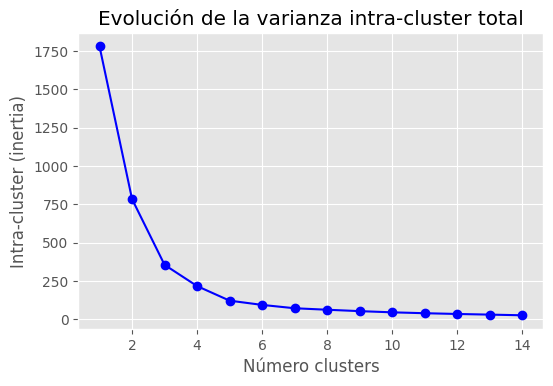

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 42
    )
    modelo_kmeans.fit(df_componentes_encoded)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o', color='blue')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

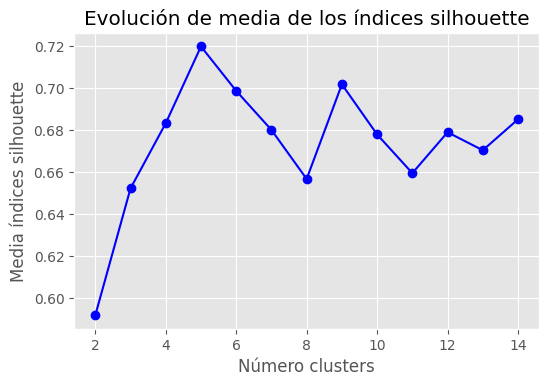

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 123
    )
    cluster_labels = modelo_kmeans.fit_predict(df_componentes_encoded)
    silhouette_avg = silhouette_score(df_componentes_encoded, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o', color='blue')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Después del análisis, utilizando tanto el método del codo como el método de la silueta para determinar el número óptimo de clusters, hemos llegado a la conclusión de que el número ideal de clusters para nuestros datos es 5, ya que para el Silhouette tiene el valor de índice más alto (0.72) y aunque con el Elbow se podía dudar entre 5 o 6 clústers, elegimos el 5 al estar también respaldado por el otro método.

#### KMeans ####

Tiempo de KMeans:  0.04914426803588867
Silhouette Score: 0.7199491135918034


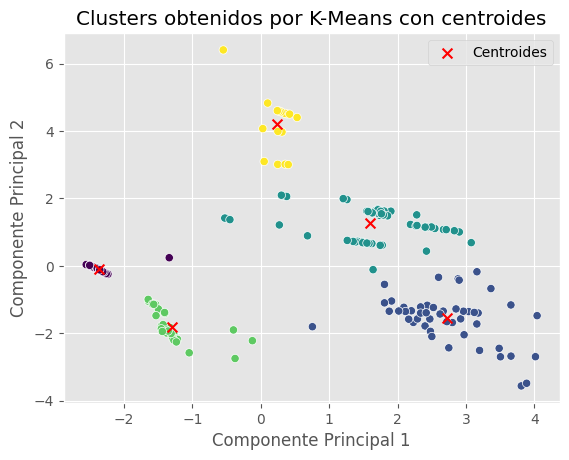

     Temperature              L          R    A_M  blue  orange  pale  red  \
0           3068       0.002400     0.1700  16.12     0       0     0    1   
1           3042       0.000500     0.1542  16.60     0       0     0    1   
2           2600       0.000300     0.1020  18.70     0       0     0    1   
3           2800       0.000200     0.1600  16.65     0       0     0    1   
4           1939       0.000138     0.1030  20.06     0       0     0    1   
..           ...            ...        ...    ...   ...     ...   ...  ...   
235        38940  374830.000000  1356.0000  -9.93     1       0     0    0   
236        30839  834042.000000  1194.0000 -10.63     1       0     0    0   
237         8829  537493.000000  1423.0000 -10.73     0       0     0    0   
238         9235  404940.000000  1112.0000 -11.23     0       0     0    0   
239        37882  294903.000000  1783.0000  -7.80     1       0     0    0   

     white  whitish  yellow  yellowish  A  B  F  G  K  M  O  Cl

In [ ]:
modelo_kmeans = KMeans(n_clusters=5, n_init=25, random_state=100472236)

# Iniciar el contador de tiempo antes de ajustar el modelo
start_time = time.time()
modelo_kmeans.fit(X=df_componentes_encoded)
# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time

# Imprimir el tiempo de entrenamiento
print("Tiempo de KMeans: ", training_time)

# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=df_componentes_encoded)

# Calcular el coeficiente de Silueta
silhouette_score_value = silhouette_score(df_componentes_encoded, y_predict)

# Imprimir el coeficiente de Silueta
print("Silhouette Score:", silhouette_score_value)

# Añadir una columna 'Cluster' al DataFrame original
dataset_encoded['Cluster'] = y_predict

# Generar el gráfico de dispersión
plt.scatter(df_componentes_encoded['Componente_1'], df_componentes_encoded['Componente_2'], c=y_predict, cmap='viridis',edgecolor='white')

# Marcar los centroides de los clusters con una 'x' roja
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], marker='x', color='red', s=50, label='Centroides')

# Mostrar el gráfico
plt.title('Clusters obtenidos por K-Means con centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

print(dataset_encoded)

Tras aplicar el *KMeans* a los datos, hemos añadido al dataset una columna en la que cada dato ha recibido un numero indicando a que clúster pertenece.

Tras esto calcularemos la media de los valores como luminosidad, temperatura, etc. También calcularemos valores de la moda para el color y la clase spectral, con el objetivo de identificar las características de cada uno de los clústers generados.

In [ ]:
# Calcula las medias de todas las columnas agrupadas por el número de cluster
medias_por_cluster = dataset_encoded.groupby('Cluster')[['Temperature', 'L', 'R', 'A_M']].mean()

# Guarda el resultado en un nuevo DataFrame
nuevo_dataset = medias_por_cluster.reset_index()

# Agrupar los datos por el valor en la columna seleccionada
grupos = dataset_encoded.groupby('Cluster')
# Inicializar variables para mantener la suma máxima de cada columna y su nombre de columna correspondiente
maximos_por_cluster = {}

# Iterar sobre cada grupo
for valor, grupo in grupos:
    # Calcular la suma de cada columna por separado para el grupo actual
    sumas_por_columna = grupo[['blue', 'orange', 'pale', 'red', 'white', 'whitish', 'yellow', 'yellowish']].sum()  # Agrega las columnas que desees sumar
    # Obtener el nombre de la columna con el valor máximo para este grupo
    columna_con_maximo = sumas_por_columna.idxmax()

    # Obtener el valor máximo para esta columna
    maximo_grupo = sumas_por_columna[columna_con_maximo]

    # Agregar el nombre de la columna al diccionario
    maximos_por_cluster[valor] = columna_con_maximo

nuevo_dataset['Color'] = nuevo_dataset['Cluster'].map(maximos_por_cluster)

# Inicializar variables para mantener la suma máxima de cada columna y su nombre de columna correspondiente
maximos_por_cluster_tipo = {}

# Iterar sobre cada grupo
for valor, grupo in grupos:
    # Calcular la suma de cada columna por separado para el grupo actual
    sumas_por_columna = grupo[['A', 'B', 'F', 'G', 'K', 'M']].sum()  # Agrega las columnas que desees sumar
    # Obtener el nombre de la columna con el valor máximo para este grupo
    columna_con_maximo = sumas_por_columna.idxmax()

    # Obtener el valor máximo para esta columna
    maximo_grupo = sumas_por_columna[columna_con_maximo]

    # Agregar el nombre de la columna al diccionario
    maximos_por_cluster_tipo[valor] = columna_con_maximo

nuevo_dataset['Clase'] = nuevo_dataset['Cluster'].map(maximos_por_cluster_tipo)

# Nuevo DataFrame
print(nuevo_dataset)

   Cluster   Temperature              L            R        A_M  Color Clase
0        0   3165.222222       0.010790     0.237067  14.923691    red     M
1        1  22144.140000  351309.420000   431.125740  -6.954340   blue     B
2        2  15082.322034   14079.854085    33.017042   5.780390   blue     B
3        3   3671.454545  222090.909091  1011.666667  -8.993030    red     M
4        4   8516.823529       1.383960     0.551334   8.611765  white     F


#### Clúster Jerárquico ####

Un clustering jerárquico organiza los datos en una estructura jerárquica de clusters, donde los clusters más cercanos entre sí se agrupan para formar clusters más grandes, y este proceso se repite hasta que todos los puntos de datos están agrupados en un único cluster o hasta que se alcanza un criterio de parada predefinido.

Dentro de los jerárquicos utilizaremos el aglomerativo (ascendente) que comienza con cada punto de datos como un cluster individual y, en cada paso, fusiona los dos clusters más cercanos entre sí hasta que todos los puntos están en un solo cluster. Este enfoque crea una estructura de árbol o dendrograma donde los clusters más pequeños se fusionan gradualmente para formar clusters más grandes.

Decidimos utilizar este método porque los dendrogramas resultantes de la aplicación de este método pueden ser útiles para visualizar la estructura de los clústers y entender las relaciones entre ellos. Además, los clustering jerárquicos no requieren especificar previamente el número de clusters, lo que puede ser una ventaja.

In [ ]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

La siguiente función sirve para dibujar los diferentes dendogramas desarrollados por el algorimo del cluster jerárquico. La iremos llamando con distancias diferentes.

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

Vamos a utilizar diferentes modelos de clustering jerárquico aglomerativo, utilizando diferentes métodos de enlace para agrupar los datos, en concreto:

  -  Modelo_hclust_complete: Este modelo utiliza el método de enlace completo (complete linkage). En este método, la distancia entre dos clusters se define como la máxima distancia entre sus puntos más cercanos. Esto significa que la distancia entre dos clusters se calcula como la distancia más grande entre cualquier par de puntos, uno en cada cluster. Este enfoque tiende a formar clusters compactos y bien separados.

  - Modelo_hclust_average: Este modelo utiliza el método de enlace promedio (average linkage). En este método, la distancia entre dos clusters se define como el promedio de las distancias entre todos los pares de puntos, uno en cada cluster. Esto puede resultar en clusters más equilibrados y menos sesgados hacia clusters con tamaños desiguales.

  - Modelo_hclust_ward: Este modelo utiliza el método de enlace de Ward. En este método, la distancia entre dos clusters se define como la suma de cuadrados de las diferencias dentro de cada cluster después de la fusión. El método de Ward tiende a minimizar la varianza dentro de cada cluster y es adecuado para datos donde la varianza no es constante en todas las dimensiones.

Cada modelo está configurado para no especificar un número fijo de clusters (n_clusters = None), lo que significa que los clusters se formarán en función de un umbral de distancia (distance_threshold) o en función de la distancia entre los puntos.

In [ ]:
# Modelos
# ==============================================================================
modelo_hclust_complete = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'complete',
    distance_threshold = 0,
    n_clusters         = None
)
start_time = time.time()
modelo_hclust_complete.fit(X=df_componentes_encoded)
# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time

# Imprimir el tiempo de entrenamiento
print("Tiempo de modelo_hclust_complete: ", training_time)

modelo_hclust_average = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'average',
    distance_threshold = 0,
    n_clusters         = None
)
start_time = time.time()
modelo_hclust_average.fit(X=df_componentes_encoded)
# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time

# Imprimir el tiempo de entrenamiento
print("Tiempo de modelo_hclust_average: ", training_time)

modelo_hclust_ward = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'ward',
    distance_threshold = 0,
    n_clusters         = None
)
start_time = time.time()
modelo_hclust_ward.fit(X=df_componentes_encoded)
# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time

# Imprimir el tiempo de entrenamiento
print("Tiempo de modelo_hclust_ward: ", training_time)

Tiempo de modelo_hclust_complete:  0.006188631057739258
Tiempo de modelo_hclust_average:  0.0071527957916259766
Tiempo de modelo_hclust_ward:  0.00661015510559082


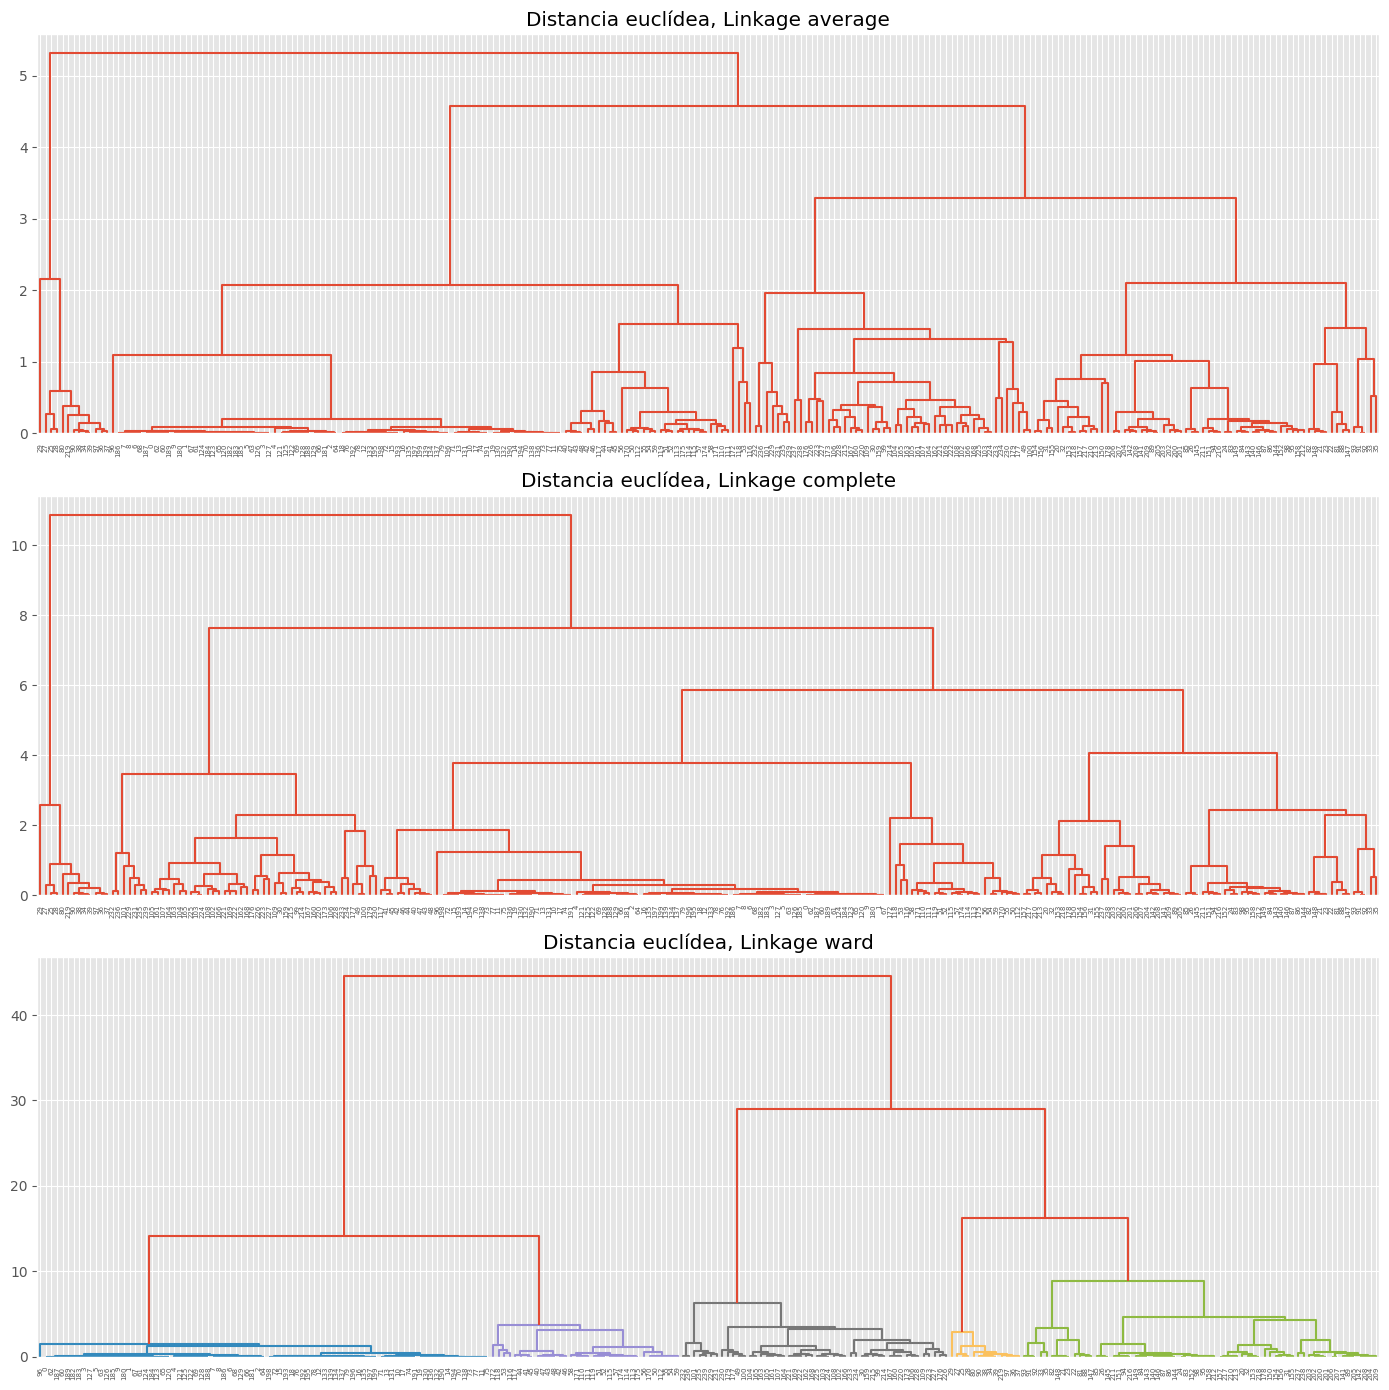

In [ ]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(14, 14))
plot_dendrogram(modelo_hclust_average, labels=df_componentes_encoded.index, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, labels=df_componentes_encoded.index, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, labels=df_componentes_encoded.index, color_threshold=9, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

Después de considerar tres posibilidades con la distancia euclidiana, hemos llegado a la conclusión de que el modelo_hclust_ward es la opción más adecuada. Esto se debe a que podemos observar claramente cómo agrupa los datos en alrededor de 5 clusters a una distancia de aproximadamente 9 unidades.

Esta elección implica que al optar por este método, estamos minimizando la varianza después de cada fusión de clusters, lo cual es fundamental para comprender el funcionamiento de este algoritmo.

La varianza, en este contexto, se refiere a la dispersión de los puntos de datos dentro de un cluster. Una varianza baja indica que los puntos de datos dentro de un cluster están más cerca entre sí y, por lo tanto, forman grupos más compactos y bien definidos.

A continuación, presentaremos un gráfico que ilustra cómo divide los datos este modelo.

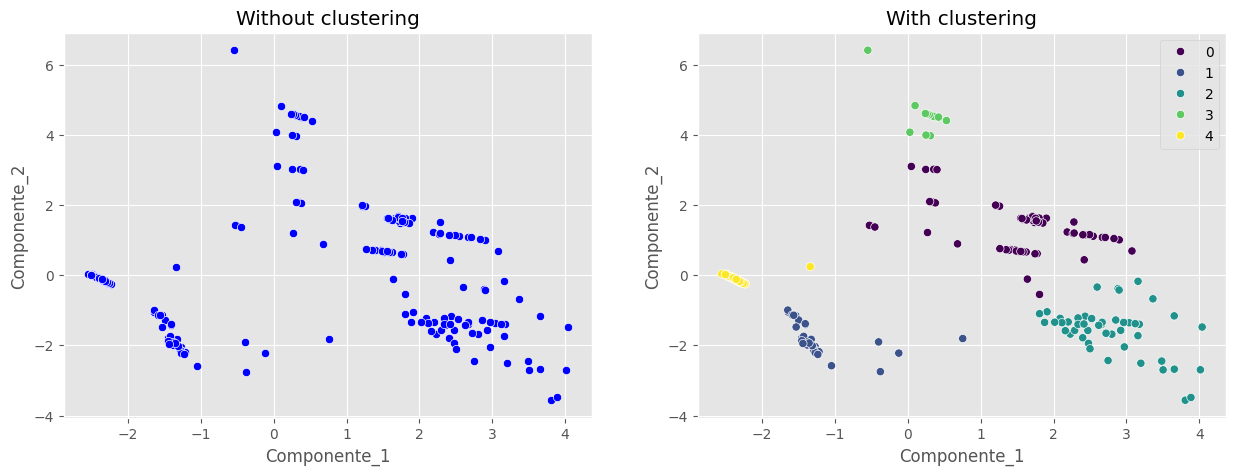

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=5, linkage="ward")
clustering_model.fit(df_componentes_encoded)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_componentes_encoded, x='Componente_1', y='Componente_2', color='blue').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_componentes_encoded, x='Componente_1', y='Componente_2', hue=clustering_model.labels_, palette='viridis').set_title('With clustering');

Podemos observar que la distribución de los datos dentro del conjunto es bastante similar a la obtenida con KMeans. Esto sugiere que ambos modelos están agrupando los mismos datos y, por lo tanto, tendrán medias y modas similares para las clases.

In [ ]:
dataset_jerarquico = dataset_encoded.copy()

# Añadir una columna 'Cluster' al DataFrame original
dataset_jerarquico['Cluster'] = labels

# Suponiendo que tienes un DataFrame df con tus datos y la columna 'Cluster' que indica a qué cluster pertenece cada punto

# Calcula las medias de todas las columnas agrupadas por el número de cluster
medias_por_cluster = dataset_jerarquico.groupby('Cluster')[['Temperature', 'L', 'R', 'A_M']].mean()

# Guarda el resultado en un nuevo DataFrame
nuevo_dataset_jerarquico = medias_por_cluster.reset_index()

# Suponiendo que tienes un DataFrame dataset_encoded con tus datos y la columna 'Cluster' que indica a qué cluster pertenece cada punto
# Suponiendo que las columnas relacionadas con colores comienzan con 'Color_'

# Agrupar los datos por el valor en la columna seleccionada
grupos = dataset_jerarquico.groupby('Cluster')
# Inicializar variables para mantener la suma máxima de cada columna y su nombre de columna correspondiente
maximos_por_cluster = {}

# Iterar sobre cada grupo
for valor, grupo in grupos:
    # Calcular la suma de cada columna por separado para el grupo actual
    sumas_por_columna = grupo[['blue', 'orange', 'pale', 'red', 'white', 'whitish', 'yellow', 'yellowish']].sum()  # Agrega las columnas que desees sumar
    # Obtener el nombre de la columna con el valor máximo para este grupo
    columna_con_maximo = sumas_por_columna.idxmax()

    # Obtener el valor máximo para esta columna
    maximo_grupo = sumas_por_columna[columna_con_maximo]

    # Agregar el nombre de la columna al diccionario
    maximos_por_cluster[valor] = columna_con_maximo

nuevo_dataset_jerarquico['Color'] = nuevo_dataset_jerarquico['Cluster'].map(maximos_por_cluster)

# Inicializar variables para mantener la suma máxima de cada columna y su nombre de columna correspondiente
maximos_por_cluster_tipo = {}

# Iterar sobre cada grupo
for valor, grupo in grupos:
    # Calcular la suma de cada columna por separado para el grupo actual
    sumas_por_columna = grupo[['A', 'B', 'F', 'G', 'K', 'M']].sum()  # Agrega las columnas que desees sumar
    # Obtener el nombre de la columna con el valor máximo para este grupo
    columna_con_maximo = sumas_por_columna.idxmax()

    # Obtener el valor máximo para esta columna
    maximo_grupo = sumas_por_columna[columna_con_maximo]

    # Agregar el nombre de la columna al diccionario
    maximos_por_cluster_tipo[valor] = columna_con_maximo

nuevo_dataset_jerarquico['Clase'] = nuevo_dataset_jerarquico['Cluster'].map(maximos_por_cluster_tipo)

# Muestra el nuevo DataFrame
print(nuevo_dataset_jerarquico)


   Cluster   Temperature              L            R        A_M  Color Clase
0        0  14764.562500   21378.193619    52.672555   5.975359   blue     B
1        1   3689.558824  234088.235294  1020.588235  -8.999118    red     M
2        2  22793.562500  341624.541667   392.047646  -6.828896   blue     B
3        3   7580.000000       1.809747     0.718049   7.253077  white     F
4        4   3165.222222       0.010790     0.237067  14.923691    red     M


#### Conclusiones ####

Después de realizar los modelos de clustering, es crucial comparar las soluciones obtenidas para determinar cuál se acerca más a los datos óptimos.

En términos de velocidad, el algoritmo KMeans es aproximadamente diez veces más rápido que el clustering jerárquico. Sin embargo, al comparar los resultados con los datos proporcionados en el enunciado, podemos ver que:

- Aunque ambos modelos identifican 5 clusters en lugar de los 6 indicados en la solución, la distribución de temperaturas difiere significativamente. Mientras que el clustering jerárquico muestra una concentración de valores bajos con tres grupos por debajo de 10.000, el KMeans produce un grupo más pequeño con valores alrededor de 8.000.

- Por otro lado, si nos fijamos en la luminosidad, los valores predichos por el clustering jerárquico se aproximan más a los valores reales proporcionados en el enunciado. En contraste, el KMeans muestra valores de media que duplican el valor máximo mencionado.

- La distribución de los radios predichos por ambos modelos se aleja de los valores proporcionados en el enunciado.

- En cuanto a los colores, el clustering jerárquico muestra una mayor variedad en comparación con el predominio del color azul en el KMeans.

En general, aunque ninguno de los modelos produce una asignación perfecta de los datos a los clusters, el clustering jerárquico parece ser una mejor opción debido a su mayor coherencia con los valores reales proporcionados en el enunciado. Sin embargo, es importante tener en cuenta que aún existen algunas discrepancias entre los resultados del modelo y los datos de referencia.

### Clustering ordinal ###


Vamos a repetir el proceso anterior, pero esta vez utilizando los datos que han sido preprocesados con una clasificación ordinal en los valores categóricos.

Como antes, antes de iniciar el proceso, vamos a obtener el número óptimo de clusters, utilizando para ello los métodos descritos en el apartado anterior (elbow y silhouette).

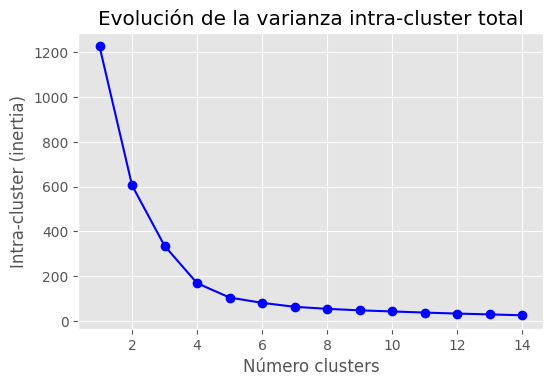

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 100472279
    )
    modelo_kmeans.fit(df_componentes_ordinal)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o', color='blue')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

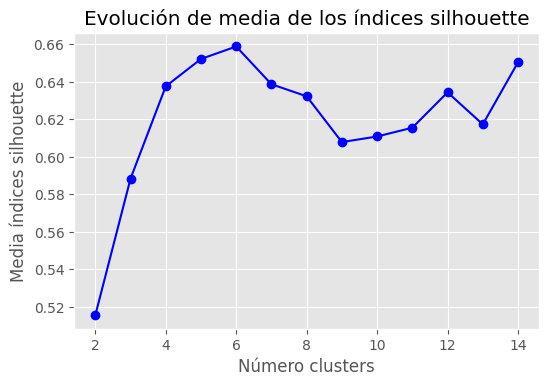

In [ ]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 100472279
    )
    cluster_labels = modelo_kmeans.fit_predict(df_componentes_ordinal)
    silhouette_avg = silhouette_score(df_componentes_ordinal, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o', color='blue')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Tras analizar el número óptimo de clusters, hemos concluido que el número adecuado de clusters para nuestro conjunto de datos es 6. Aunque valores como 5 o 14 también podrían ser considerados, hemos observado que el valor de 6 se ajusta mejor a nuestra situación específica.

Esta decisión se fundamenta en la evaluación de diversos factores, incluida la interpretación de los resultados y la coherencia con el contexto del problema.

#### KMeans ####

Tiempo de KMeans:  0.04485464096069336


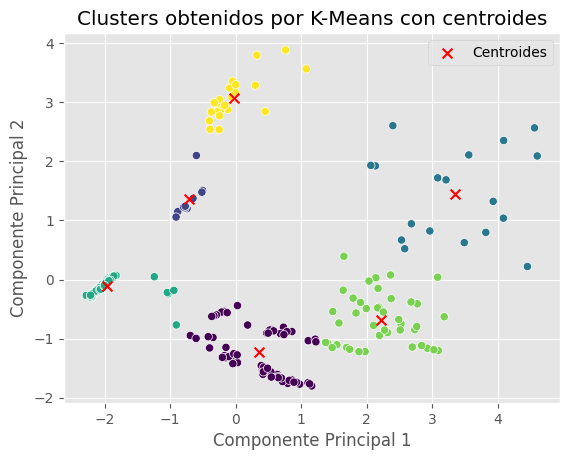

     Temperature              L          R    A_M  Color  Spectral_Class  \
0           3068       0.002400     0.1700  16.12     11               7   
1           3042       0.000500     0.1542  16.60     11               7   
2           2600       0.000300     0.1020  18.70     11               7   
3           2800       0.000200     0.1600  16.65     11               7   
4           1939       0.000138     0.1030  20.06     11               7   
..           ...            ...        ...    ...    ...             ...   
235        38940  374830.000000  1356.0000  -9.93      1               1   
236        30839  834042.000000  1194.0000 -10.63      1               1   
237         8829  537493.000000  1423.0000 -10.73      3               3   
238         9235  404940.000000  1112.0000 -11.23      3               3   
239        37882  294903.000000  1783.0000  -7.80      1               1   

     Cluster  
0          3  
1          3  
2          3  
3          3  
4          3

In [ ]:
modelo_kmeans = KMeans(n_clusters=6, n_init=25, random_state=100472236)
start_time = time.time()
modelo_kmeans.fit(X=df_componentes_ordinal)
# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time
# Imprimir el tiempo de entrenamiento
print("Tiempo de KMeans: ", training_time)


# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=df_componentes_ordinal)

# Añadir una columna 'Cluster' al DataFrame original
dataset_ordinal['Cluster'] = y_predict

# Generar el gráfico de dispersión
plt.scatter(df_componentes_ordinal['Componente_1'], df_componentes_ordinal['Componente_2'], c=y_predict, cmap='viridis',edgecolor='white')

# Marcar los centroides de los clusters con una 'x' roja
plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1], marker='x', color='red', s=50, label='Centroides')

# Mostrar el gráfico
plt.title('Clusters obtenidos por K-Means con centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

print(dataset_ordinal)

Después de realizar el análisis con KMeans, observamos que los datos se dividen claramente en 6 clusters distintos. Hemos añadido una columna al conjunto de datos para indicar a qué cluster pertenece cada punto.

A continuación, calcularemos las medias de los datos numéricos y las modas de los datos categóricos para obtener una comprensión más completa de la composición de los clusters.

In [ ]:
# Calcula las medias de todas las columnas agrupadas por el número de cluster
medias_por_cluster = dataset_ordinal.groupby('Cluster')[['Temperature', 'L', 'R', 'A_M']].mean()

color_mapping = {'blue': 1, 'blue white': 2, 'white': 3, 'whitish':4 , 'yellow white': 5, 'yellowish white': 6,
                 'yellowish': 7, 'pale yellow orange': 8, 'orange': 9, 'red orange': 10, 'red': 11}
class_mapping = {'O': 1, 'B': 2, 'A': 3, 'F':4 , 'G': 5, 'K': 6,'M': 7}

# Guarda el resultado en un nuevo DataFrame
nuevo_dataset_ordinal = medias_por_cluster.reset_index()

# Agrupar los datos por el valor en la columna seleccionada
grupos = dataset_ordinal.groupby('Cluster')

# Inicializar variables para mantener la suma máxima de cada columna y su nombre de columna correspondiente
maximos_por_cluster = {}

# Iterar sobre cada grupo
for valor, grupo in grupos:
    # Calcular la suma de cada columna por separado para el grupo actual
    sumas_por_columna = grupo[['Color']].value_counts()  # Agrega las columnas que desees sumar
    # Obtener el nombre de la columna con el valor máximo para este grupo
    columna_con_maximo = sumas_por_columna.idxmax()[0]
    nombre_mas_comun = list(color_mapping.keys())[list(color_mapping.values()).index(columna_con_maximo)]

    # Agregar el nombre de la columna al diccionario
    maximos_por_cluster[valor] = nombre_mas_comun

nuevo_dataset_ordinal['Color'] = nuevo_dataset_ordinal['Cluster'].map(maximos_por_cluster)

# Iterar sobre cada grupo
for valor, grupo in grupos:
    # Calcular la suma de cada columna por separado para el grupo actual
    sumas_por_columna = grupo[['Spectral_Class']].value_counts()  # Agrega las columnas que desees sumar
    # Obtener el nombre de la columna con el valor máximo para este grupo
    columna_con_maximo = sumas_por_columna.idxmax()[0]

    nombre_mas_comun = list(class_mapping.keys())[list(class_mapping.values()).index(columna_con_maximo)]

    # Agregar el nombre de la columna al diccionario
    maximos_por_cluster[valor] = nombre_mas_comun

nuevo_dataset_ordinal['Spectral_Class'] = nuevo_dataset_ordinal['Cluster'].map(maximos_por_cluster)


# Nuevo DataFrame
print(nuevo_dataset_ordinal)


   Cluster   Temperature              L            R        A_M       Color  \
0        0  12608.901639     136.169234     1.274346   8.322934  blue white   
1        1   3466.800000  206600.000000   129.500000  -6.798000         red   
2        2  24015.888889  512365.611111  1105.388889  -8.730667        blue   
3        3   3261.129412       0.017283     0.258887  14.593094         red   
4        4  21793.357143  203221.857143    52.883976  -5.552738        blue   
5        5   3782.375000  245541.666667  1391.875000  -9.916250         red   

  Spectral_Class  
0              B  
1              M  
2              O  
3              M  
4              O  
5              M  


#### Clúster jerárquico ####

Tiempo de modelo_hclust_complete:  0.006505489349365234
Tiempo de modelo_hclust_average:  0.0033609867095947266
Tiempo de modelo_hclust_ward:  0.004037141799926758


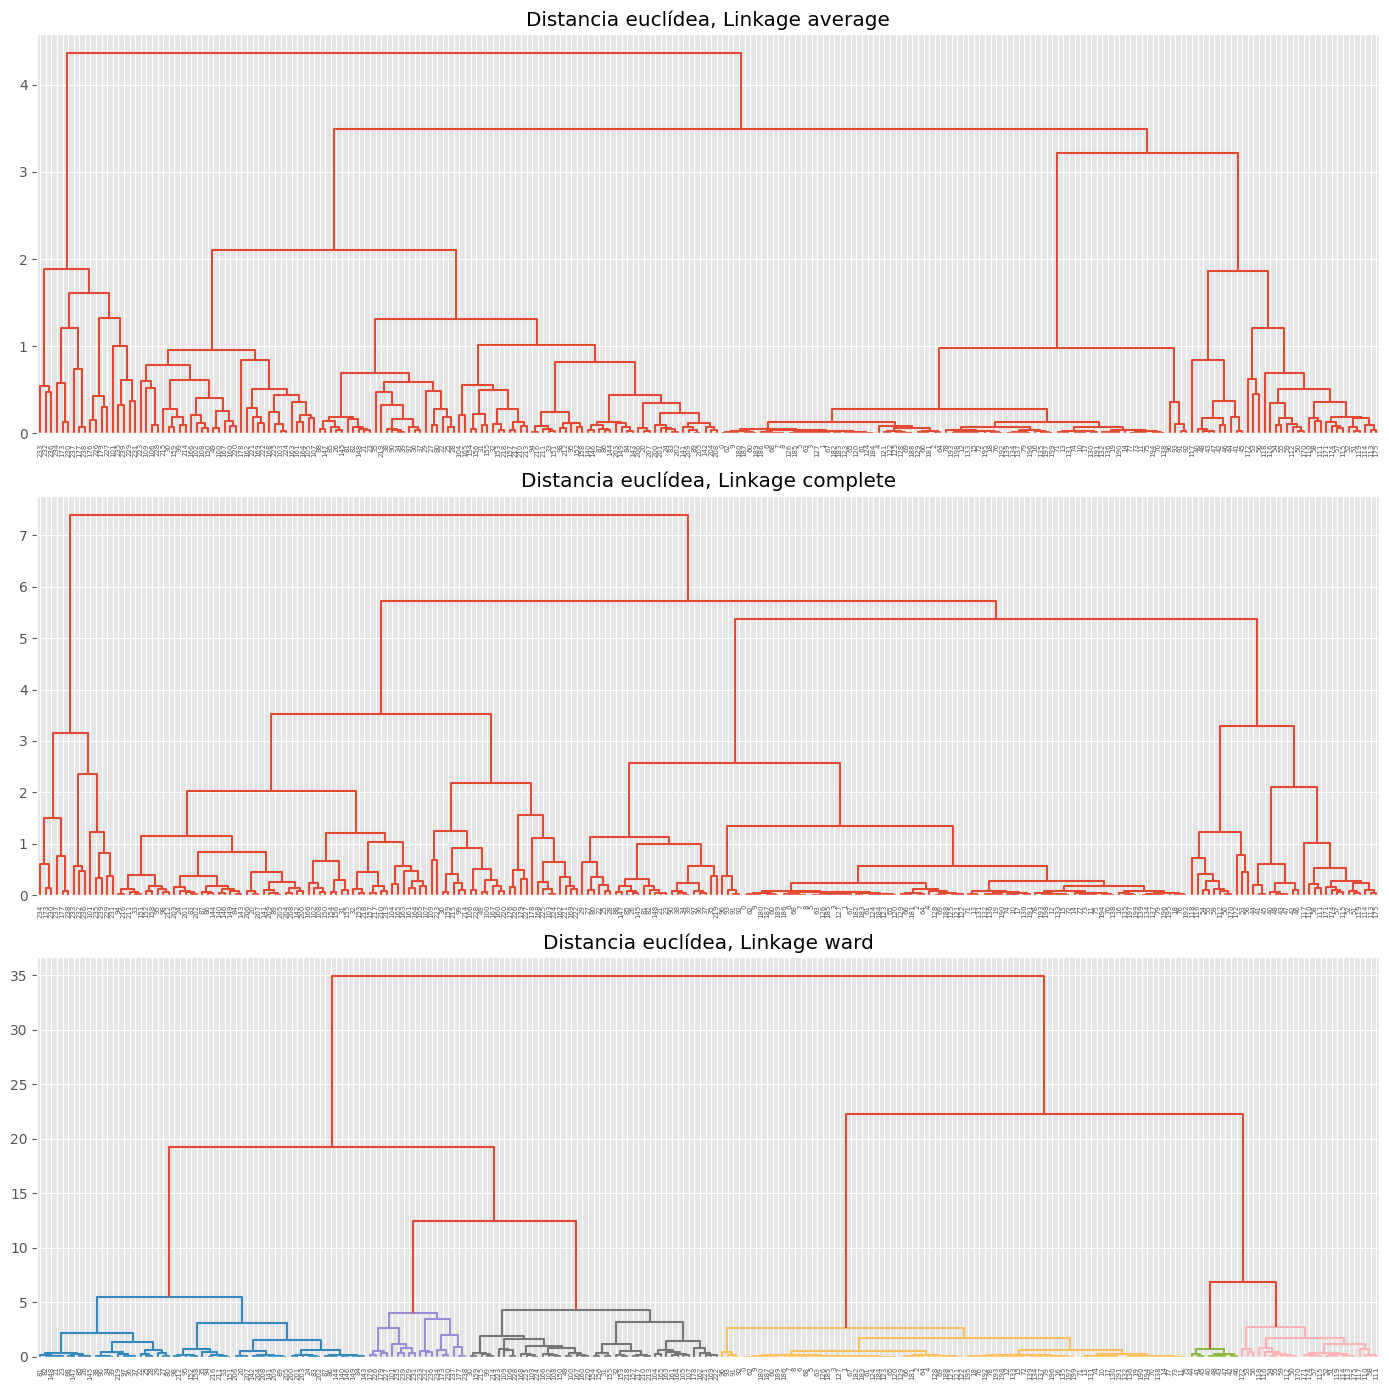

In [ ]:
# Modelos
# ==============================================================================
modelo_hclust_complete = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'complete',
    distance_threshold = 0,
    n_clusters         = None
)
start_time = time.time()
modelo_hclust_complete.fit(X=df_componentes_ordinal)
# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time

# Imprimir el tiempo de entrenamiento
print("Tiempo de modelo_hclust_complete: ", training_time)

modelo_hclust_average = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'average',
    distance_threshold = 0,
    n_clusters         = None
)
start_time = time.time()
modelo_hclust_average.fit(X=df_componentes_ordinal)
# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time

# Imprimir el tiempo de entrenamiento
print("Tiempo de modelo_hclust_average: ", training_time)

modelo_hclust_ward = AgglomerativeClustering(
    affinity = 'euclidean',
    linkage  = 'ward',
    distance_threshold = 0,
    n_clusters         = None
)
start_time = time.time()
modelo_hclust_ward.fit(X=df_componentes_ordinal)
# Calcular el tiempo de entrenamiento del modelo
training_time = time.time() - start_time

# Imprimir el tiempo de entrenamiento
print("Tiempo de modelo_hclust_ward: ", training_time)

# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(14, 14))
plot_dendrogram(modelo_hclust_average, labels=df_componentes_encoded.index, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, labels=df_componentes_encoded.index, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, labels=df_componentes_encoded.index, color_threshold=6, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();


Después de evaluar diferentes modelos, decidimos volver a seleccionar el modelo_hclust_ward. Este modelo agrupa los datos minimizando la varianza, y a una distancia de 6 unidades podemos encontrar los 6 clusters que dividen los datos de manera óptima.

A continuación, mostraremos la distribución de los datos según estos clusters.

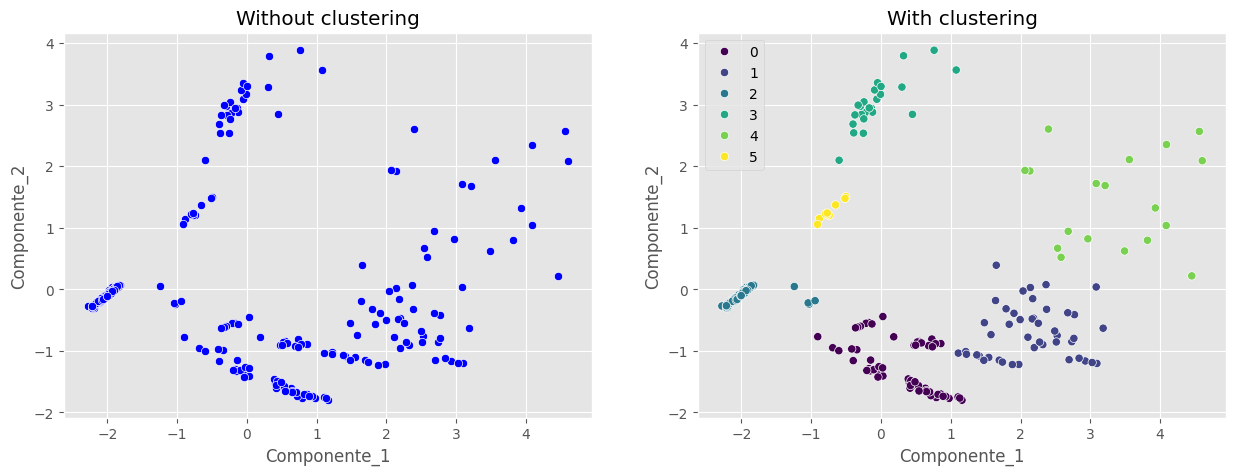

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=6, linkage="ward")
clustering_model.fit(df_componentes_ordinal)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_componentes_ordinal, x='Componente_1', y='Componente_2', color='blue').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_componentes_ordinal, x='Componente_1', y='Componente_2', hue=clustering_model.labels_, palette='viridis').set_title('With clustering');

Volveremos a calcular las medias y modas de los clusters obtenidos para poder sacar conclusiones:

In [ ]:
dataset_jerarquico_ordinal = dataset_encoded.copy()

# Añadir una columna 'Cluster' al DataFrame original
dataset_jerarquico_ordinal['Cluster'] = labels

# Suponiendo que tienes un DataFrame df con tus datos y la columna 'Cluster' que indica a qué cluster pertenece cada punto

# Calcula las medias de todas las columnas agrupadas por el número de cluster
medias_por_cluster = dataset_jerarquico_ordinal.groupby('Cluster')[['Temperature', 'L', 'R', 'A_M']].mean()

# Guarda el resultado en un nuevo DataFrame
nuevo_dataset_jerarquico_ordinal = medias_por_cluster.reset_index()

# Suponiendo que tienes un DataFrame dataset_encoded con tus datos y la columna 'Cluster' que indica a qué cluster pertenece cada punto
# Suponiendo que las columnas relacionadas con colores comienzan con 'Color_'

# Agrupar los datos por el valor en la columna seleccionada
grupos = dataset_jerarquico_ordinal.groupby('Cluster')
# Inicializar variables para mantener la suma máxima de cada columna y su nombre de columna correspondiente
maximos_por_cluster = {}

# Iterar sobre cada grupo
for valor, grupo in grupos:
    # Calcular la suma de cada columna por separado para el grupo actual
    sumas_por_columna = grupo[['blue', 'orange', 'pale', 'red', 'white', 'whitish', 'yellow', 'yellowish']].sum()  # Agrega las columnas que desees sumar
    # Obtener el nombre de la columna con el valor máximo para este grupo
    columna_con_maximo = sumas_por_columna.idxmax()

    # Obtener el valor máximo para esta columna
    maximo_grupo = sumas_por_columna[columna_con_maximo]

    # Agregar el nombre de la columna al diccionario
    maximos_por_cluster[valor] = columna_con_maximo

nuevo_dataset_jerarquico_ordinal['Color'] = nuevo_dataset_jerarquico_ordinal['Cluster'].map(maximos_por_cluster)

# Inicializar variables para mantener la suma máxima de cada columna y su nombre de columna correspondiente
maximos_por_cluster_tipo = {}

# Iterar sobre cada grupo
for valor, grupo in grupos:
    # Calcular la suma de cada columna por separado para el grupo actual
    sumas_por_columna = grupo[['A', 'B', 'F', 'G', 'K', 'M']].sum()  # Agrega las columnas que desees sumar
    # Obtener el nombre de la columna con el valor máximo para este grupo
    columna_con_maximo = sumas_por_columna.idxmax()

    # Obtener el valor máximo para esta columna
    maximo_grupo = sumas_por_columna[columna_con_maximo]

    # Agregar el nombre de la columna al diccionario
    maximos_por_cluster_tipo[valor] = columna_con_maximo

nuevo_dataset_jerarquico_ordinal['Clase'] = nuevo_dataset_jerarquico_ordinal['Cluster'].map(maximos_por_cluster_tipo)

# Muestra el nuevo DataFrame
print(nuevo_dataset_jerarquico_ordinal)

   Cluster   Temperature              L            R        A_M  Color Clase
0        0  12331.644068      84.903786     1.003646   8.978119  white     B
1        1  21425.044444  189747.000000    49.770222  -5.358778   blue     B
2        2   3213.880952       0.017488     0.261814  14.599202    red     M
3        3   3776.080000  238680.000000  1371.240000  -9.929600    red     M
4        4  24015.888889  512365.611111  1105.388889  -8.730667   blue     B
5        5   3449.222222  221333.333333    46.555556  -6.414444    red     M


#### Conclusiones ####

Después de realizar los modelos, es necesario comparar las soluciones obtenidas para determinar cuál se acerca más a los datos óptimos.

En términos de velocidad, el algoritmo de clustering jerárquico es aproximadamente diez veces más rápido que el KMeans. Sin embargo, al comparar los resultados con los datos proporcionados en el enunciado, observamos lo siguiente:

- En este caso el número de clústers es 6 igual que el reparto de la solución.

- En cuanto a la luminosidad, los valores obtenidos por KMeans y el clustering jerárquico son bastante similares, con una diferencia promedio de unas 300 unidades. Sin embargo, tanto en el KMeans como en el clustering jerárquico, los valores de luminosidad son más altos en comparación con los modelos del enunciado.

- Los valores del radio siguen un patrón similar a los anteriores modelos, siendo mayores que los del enunciado pero menos inflados en comparación. Además, los resultados del KMeans y el clustering jerárquico son muy similares entre sí.

- Para el A_M los valores son predominantemente negativos, esto se deberá a que están mal clasificados y que deberían estar más agrupados.

- En cuanto a los colores, en el clustering jerárquico predomina el rojo, mientras que en el KMeans se observa una variedad de colores, especialmente rojo y azul.

- Para la clase espectral, el clustering jerárquico muestra una predominancia de las clases B y M, mientras que en el KMeans predominan las clases M y O.

En general, el Cluster Jerárquico es una mejor opción para el reparto de datos en grupos. Aunque no sea un reparto perfecto, ya que existen incogruencias en los datos.

## One Hot Encoding Vs Codificación Ordinal ##


Tras evaluar separadamente los resultados del One Hot Encoding y la codificación Ordinal, podemos sacar las siguientes conclusiones.

Por un lado hemos comprobado que el reparto de clústers es mejor en la codificación ordinal, al ser el número óptimo 6 frente a los 5 del One Hot Encoding, todo esto basándonos en el ejemplo que se nos proporciona en el enunciado del proyecto.

Esto se puede deber a que la codificación ordinal es capaz de guardar la información del orden, mientras que el otro método solo asigna el valor de 1 y no se guarda esta información.

En cuanto al tiempo no hace falta compararlo, ya que ambos utilizaran la información de las componentes, siendo la misma cantidad de datos (240 filas x 2 colummnas) y al ser escalados el rango de los mismos será bastante parecido.

## Selección del mejor modelo ##

Una vez se han valorado todos los modelos con las diferentes codificaciones hemos decidido que el mejor modelo es el Clustering Jerárquico con la codificación ordinal de los atributos categóricos.

 1. Rendimiento aceptable y rapidez:
 El Clustering Jerárquico es un algoritmo relativamente rápido que puede generar agrupaciones con sentido en conjuntos de datos.

 2. Captura de relaciones de orden:
 La codificación ordinal permite capturar relaciones de orden naturales entre las categorías, si existen. Esto puede ser útil en conjuntos de datos donde el orden entre las categorías tiene un significado importante para el problema en cuestión. Por ejemplo, el orden de la clase espectral de las estrellas.

 3. Visualización intuitiva de la estructura jerárquica de los grupos:
El Clustering Jerárquico produce una estructura jerárquica de agrupaciones que puede ser visualizada fácilmente mediante dendrogramas. Estas representaciones gráficas permiten una comprensión intuitiva de cómo se organizan los datos en diferentes niveles de similitud o distancia, lo que facilita la interpretación de los resultados y la identificación de patrones dentro de los grupos.


 En general, el Clustering Jerárquico con codificación ordinal ofrece una combinación de rendimiento aceptable, rapidez de ejecución y capacidad para capturar relaciones de orden en los datos, lo que lo convierte en una opción sólida para la agrupación de datos.

## Comparación con los datos del enunciado##

Al comparar los resultados obtenidos por nuestro mejor modelo, el clustering jerárquico con codificación ordinal, observamos lo siguiennte:

- En cuanto a la temperatura, aunque el rango de datos es similar, nuestros resultados muestran valores ligeramente más altos, con cierta similitud en los valores bajos alrededor de los 3.000.

- Para la luminosidad, los valores son significativamente más altos que los proporcionados en el enunciado. Esto podría deberse a que estrellas con valores bajos han sido agrupadas en clusters con valores muy altos, lo que tiene un impacto limitado en la luminosidad, como en el caso de las enanas rojas. Por ejemplo, si una estrella de este tipo de 0'0007 de luminosidad se agrupa con una Super gigante de 300.000, no tendrá casi efecto.

- En relación al radio, observamos una tendencia similar, aunque menos pronunciada. Por ejemplo, los clusters 3 y 4 podrían corresponder a estrellas Hiper Gigantes, donde el radio debería ser alrededor de 1400.

- Para el parámetro A_M, los valores son más negativos que los de referencia. Además, los clusters 3 y 4 muestran valores similares a los de las estrellas Hiper Gigantes, lo que sugiere una posible relación estrecha entre el radio y el A_M.

- En cuanto al color, notamos discrepancias significativas. Predominan los colores rojo y azul en lugar del amarillo, como cabría esperar según el enunciado.

- En relación a la clase espectral, observamos una predominancia de las clases B y M, que se asemejan a las clases espectrales proporcionadas en el enunciado. Sin embargo, estas diferencias serían más claras si todos los datos estuvieran clasificados correctamente.

In [ ]:
# Muestra el nuevo DataFrame
print(nuevo_dataset_jerarquico_ordinal)
# Dataframe con los datos del enunciado
datos_enunciado = {
    "Clase": ["Enana roja", "Enana marrón", "Enana blanca", "Estrella en secuencia principal", "Super gigante", "Hiper gigante"],
    "Temperatura": [3000, 3300, 14000, 16000, 15000, 11000],
    "L": [7.0e-4, 5.5e-3, 2.5e-3, 3.2e4, 3.0e5, 3.0e5],
    "R": [1.0e-1, 3.5e-1, 1.0e-2, 4.4, 5.0e1, 1.4e3],
    "A_M": [17.5, 12.5, 12.6, -0.4, -6.4, -9.6],
    "Color": ["rojo", "rojo", "blanca", "blanca-amarilla", "blanca-amarilla", "amarilla"],
    "Clase Espectral": ["K-M", "M", "B-G", "B-M", "B-M", "B-M"]
}

de = pd.DataFrame(datos_enunciado)

# Mostrar el DataFrame
de

   Cluster   Temperature              L            R        A_M  Color Clase
0        0  12331.644068      84.903786     1.003646   8.978119  white     B
1        1  21425.044444  189747.000000    49.770222  -5.358778   blue     B
2        2   3213.880952       0.017488     0.261814  14.599202    red     M
3        3   3776.080000  238680.000000  1371.240000  -9.929600    red     M
4        4  24015.888889  512365.611111  1105.388889  -8.730667   blue     B
5        5   3449.222222  221333.333333    46.555556  -6.414444    red     M


,Clase,Temperatura,L,R,A_M,Color,Clase Espectral
0,Enana roja,3000,0.0007,0.10,17.5,rojo,K-M
1,Enana marrón,3300,0.0055,0.35,12.5,rojo,M
2,Enana blanca,14000,0.0025,0.01,12.6,blanca,B-G
3,Estrella en secuencia principal,16000,32000.0000,4.40,-0.4,blanca-amarilla,B-M
4,Super gigante,15000,300000.0000,50.00,-6.4,blanca-amarilla,B-M
5,Hiper gigante,11000,300000.0000,1400.00,-9.6,amarilla,B-M
